In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.head()

,ts,device,co,humidity,light,gas,motion,smoke,temp
0,1.590000e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.590000e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.590000e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.590000e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.590000e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [ ]:
df.shape

(405184, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   gas       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [ ]:
df.describe()

,ts,co,humidity,gas,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.592943e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,4.557306e+06,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.590000e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.590000e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.590000e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.600000e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.600000e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [ ]:
df.isnull().sum()

ts          0
device      0
co          0
humidity    0
light       0
gas         0
motion      0
smoke       0
temp        0
dtype: int64

In [ ]:
df['ts'].unique()

array([1.59e+09, 1.60e+09])

In [ ]:
df['device'].unique()

array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
dfle = df
dfle.light = Le.fit_transform(dfle.light)
dfle.motion = Le.fit_transform(dfle.motion)
dfle.device = Le.fit_transform(dfle.device)
dfle.ts = Le.fit_transform(dfle.ts)
dfle.head()

,ts,device,co,humidity,light,gas,motion,smoke,temp
0,0,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,0,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,0,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,0,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,0,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [ ]:
print(dfle.describe())

                  ts         device             co       humidity  \
count  405184.000000  405184.000000  405184.000000  405184.000000   
mean        0.294306       1.186671       0.004639      60.511694   
std         0.455731       0.838897       0.001250      11.366489   
min         0.000000       0.000000       0.001171       1.100000   
25%         0.000000       0.000000       0.003919      51.000000   
50%         0.000000       1.000000       0.004812      54.900000   
75%         1.000000       2.000000       0.005409      74.300003   
max         1.000000       2.000000       0.014420      99.900002   

               light            gas        motion          smoke  \
count  405184.000000  405184.000000  405184.00000  405184.000000   
mean        0.277718       0.007237       0.00119       0.019264   
std         0.447874       0.001444       0.03447       0.004086   
min         0.000000       0.002693       0.00000       0.006692   
25%         0.000000       0.006456   

In [ ]:
X = dfle.drop('motion', axis=1)
y = dfle['motion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.8, epochs = 100)

Epoch 1/100
2026/2026 [==============================] - 26s 13ms/step - loss: 0.0017 - mae: 0.0132 - val_loss: 0.0012 - val_mae: 0.0040
Epoch 2/100
2026/2026 [==============================] - 22s 11ms/step - loss: 0.0013 - mae: 0.0074 - val_loss: 0.0013 - val_mae: 0.0046
Epoch 3/100
2026/2026 [==============================] - 25s 13ms/step - loss: 0.0013 - mae: 0.0055 - val_loss: 0.0012 - val_mae: 0.0028
Epoch 4/100
2026/2026 [==============================] - 24s 12ms/step - loss: 0.0012 - mae: 0.0036 - val_loss: 0.0012 - val_mae: 0.0045
Epoch 5/100
2026/2026 [==============================] - 15s 7ms/step - loss: 0.0012 - mae: 0.0031 - val_loss: 0.0012 - val_mae: 0.0027
Epoch 6/100
2026/2026 [==============================] - 15s 8ms/step - loss: 0.0012 - mae: 0.0030 - val_loss: 0.0012 - val_mae: 0.0048
Epoch 7/100
2026/2026 [==============================] - 15s 7ms/step - loss: 0.0012 - mae: 0.0029 - val_loss: 0.0012 - val_mae: 0.0035
Epoch 8/100
2026/2026 [=====================

In [ ]:
import pickle
with open('ai1.pickle','wb') as f:
  pickle.dump(history,f)

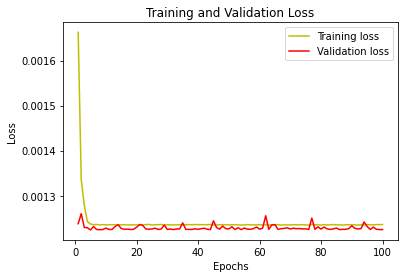

In [ ]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


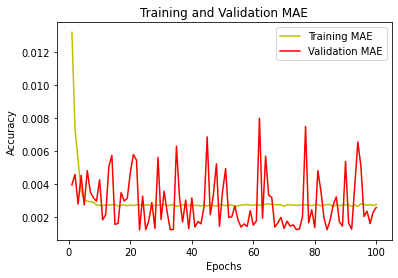

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled[1000:1010])
print("Predicted values are: ", predictions)
print("Original values are: ", y_test[1000:1010])

1/1 [==============================] - 0s 24ms/step
Predicted values are:  [[0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]
 [0.00136656]]
Original values are:  51105     0
312247    0
15880     0
272198    0
5484      0
313341    0
127797    0
20275     0
62474     0
221726    0
Name: motion, dtype: int64


In [ ]:
print(model.evaluate(X_train_scaled, y_train))

10130/10130 [==============================] - 46s 5ms/step - loss: 0.0012 - mae: 0.0026
[0.0012263791868463159, 0.0025907200761139393]


In [ ]:
print(model.evaluate(X_test_scaled, y_test))

2533/2533 [==============================] - 5s 2ms/step - loss: 0.0010 - mae: 0.0024
[0.001035622670315206, 0.0024003242142498493]


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error: ', mse_neural)
print('Mean absolute error: ', mae_neural)

2533/2533 [==============================] - 6s 2ms/step - loss: 0.0010 - mae: 0.0024
Mean squared error:  0.001035622670315206
Mean absolute error:  0.0024003242142498493
